In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import wfdb
import ast
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
db_url = './ptbxl_database.csv'
scp_url = './scp_statements.csv'

In [3]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [4]:
def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_data.index:
            tmp.append(agg_data.loc[key].diagnostic_class)
    return list(set(tmp))

In [5]:
annotation_data = pd.read_csv(db_url, index_col='ecg_id')
annotation_data.scp_codes = annotation_data.scp_codes.apply(lambda x: ast.literal_eval(x))

In [6]:
signal_data = load_raw_data(annotation_data, 100, './')

In [7]:
agg_data = pd.read_csv(scp_url, index_col = 0)

In [8]:
agg_data = agg_data[agg_data.diagnostic == 1]

In [9]:
signal_data.shape

(21837, 1000, 12)

In [11]:
signal_data

array([[[-1.190e-01, -5.500e-02,  6.400e-02, ..., -2.600e-02,
         -3.900e-02, -7.900e-02],
        [-1.160e-01, -5.100e-02,  6.500e-02, ..., -3.100e-02,
         -3.400e-02, -7.400e-02],
        [-1.200e-01, -4.400e-02,  7.600e-02, ..., -2.800e-02,
         -2.900e-02, -6.900e-02],
        ...,
        [ 6.900e-02,  0.000e+00, -6.900e-02, ...,  2.400e-02,
         -4.100e-02, -5.800e-02],
        [ 8.600e-02,  4.000e-03, -8.100e-02, ...,  2.420e-01,
         -4.600e-02, -9.800e-02],
        [ 2.200e-02, -3.100e-02, -5.400e-02, ...,  1.430e-01,
         -3.500e-02, -1.200e-01]],

       [[ 4.000e-03,  1.380e-01,  1.340e-01, ...,  1.920e-01,
          8.300e-02,  8.800e-02],
        [-2.000e-02,  1.160e-01,  1.360e-01, ...,  1.560e-01,
          5.700e-02,  6.300e-02],
        [-5.300e-02,  9.200e-02,  1.450e-01, ...,  1.070e-01,
          1.300e-02,  2.200e-02],
        ...,
        [ 1.210e-01,  3.980e-01,  2.770e-01, ..., -1.065e+00,
         -4.920e-01, -1.560e-01],
        [-3.

In [9]:
annotation_data['diagnostic_superclass'] = annotation_data.scp_codes.apply(aggregate_diagnostic)

In [10]:
annotation_data.shape

(21837, 28)

In [11]:
agg_data.head(12)

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7
IMI,inferior myocardial infarction,1.0,NaN,NaN,MI,IMI,Myocardial Infarction,inferior myocardial infarction,161.0,NaN,NaN,NaN
ASMI,anteroseptal myocardial infarction,1.0,NaN,NaN,MI,AMI,Myocardial Infarction,anteroseptal myocardial infarction,165.0,NaN,NaN,NaN
LVH,left ventricular hypertrophy,1.0,NaN,NaN,HYP,LVH,Ventricular Hypertrophy,left ventricular hypertrophy,142.0,NaN,C71076,NaN
LAFB,left anterior fascicular block,1.0,NaN,NaN,CD,LAFB/LPFB,Intraventricular and intra-atrial Conduction d...,left anterior fascicular block,101.0,MDC_ECG_BEAT_BLK_ANT_L_HEMI,C62267,D3-33140
ISC_,non-specific ischemic,1.0,NaN,NaN,STTC,ISC_,Basic roots for coding ST-T changes and abnorm...,ischemic ST-T changes,226.0,NaN,NaN,NaN


<h1>Посмотрим некоторые кардиограммы</h1>

<h2>Выберем 5 случайных пациентов в диапазоне от 500 до 160000</h2>

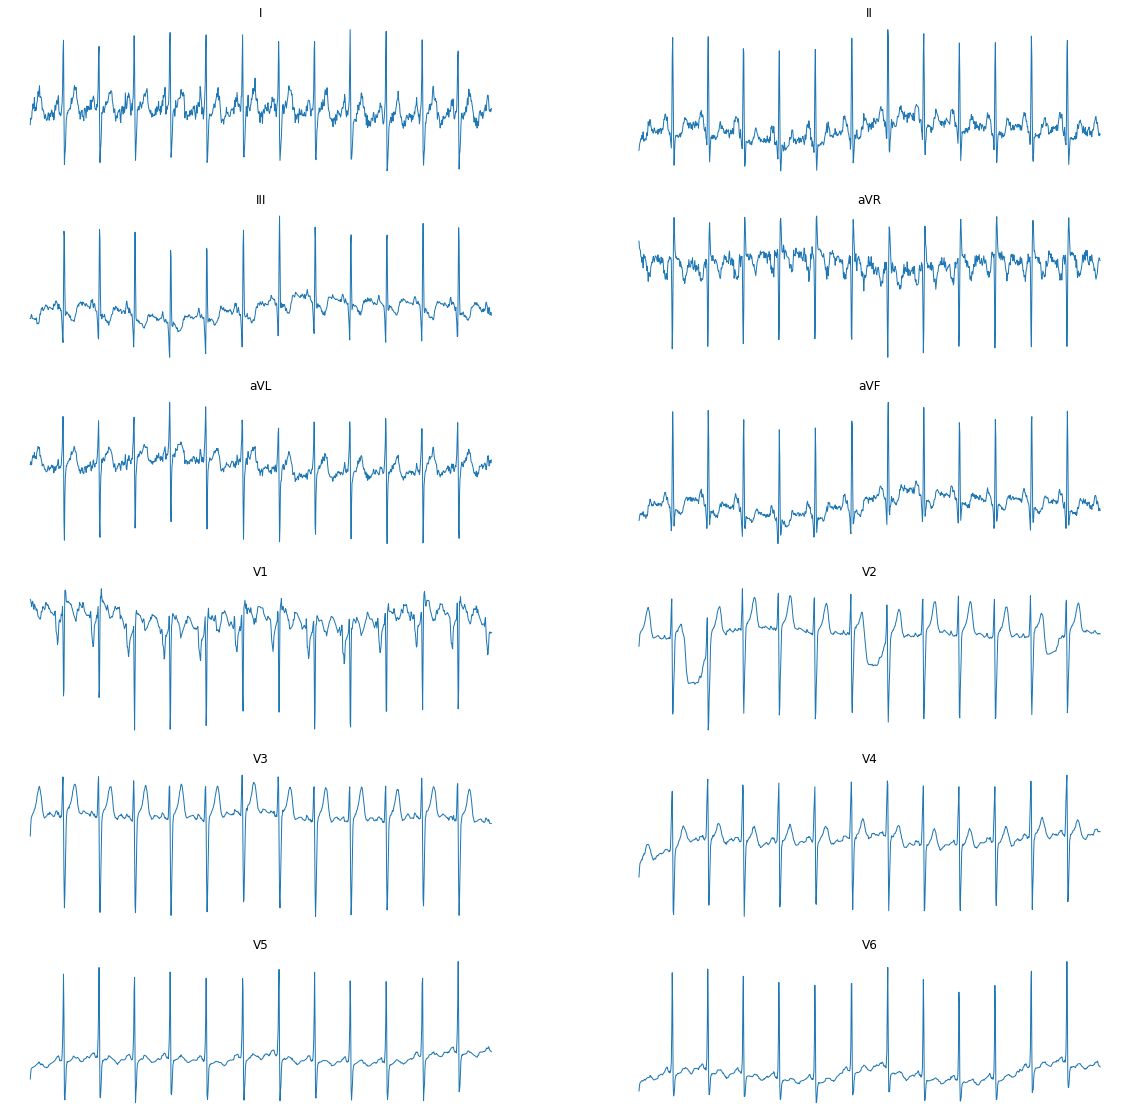

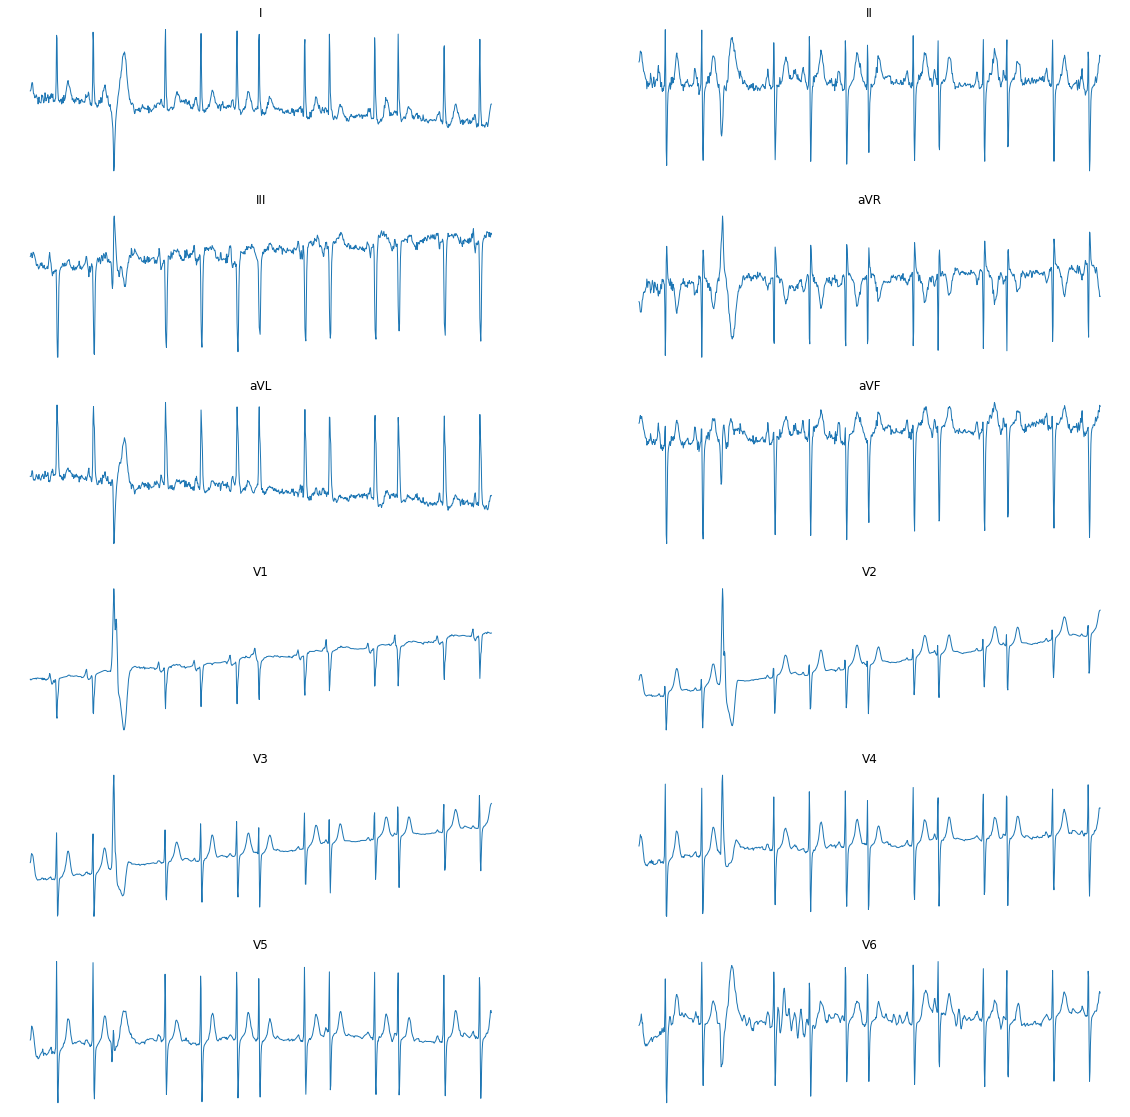

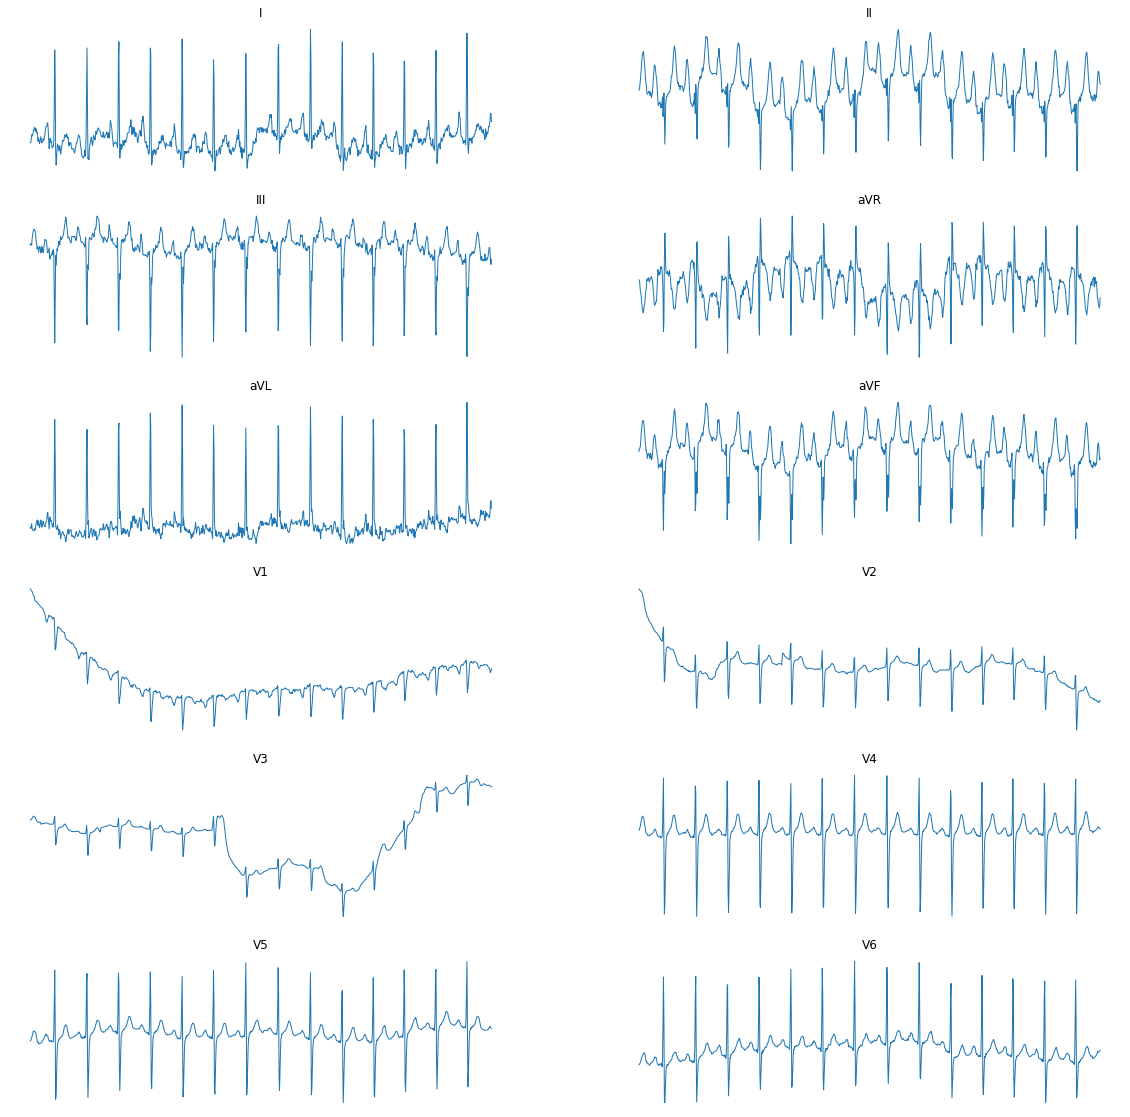

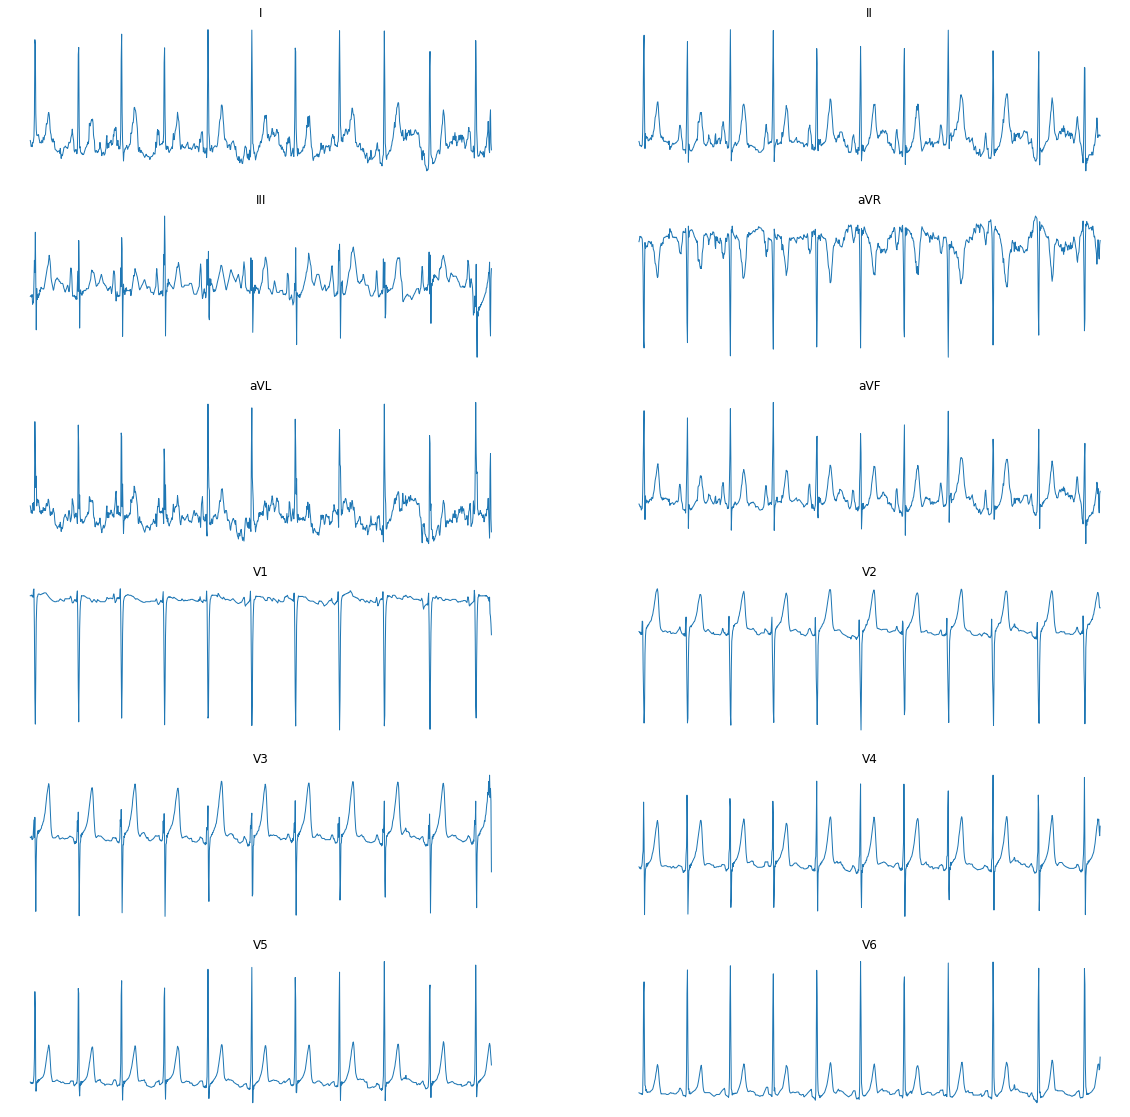

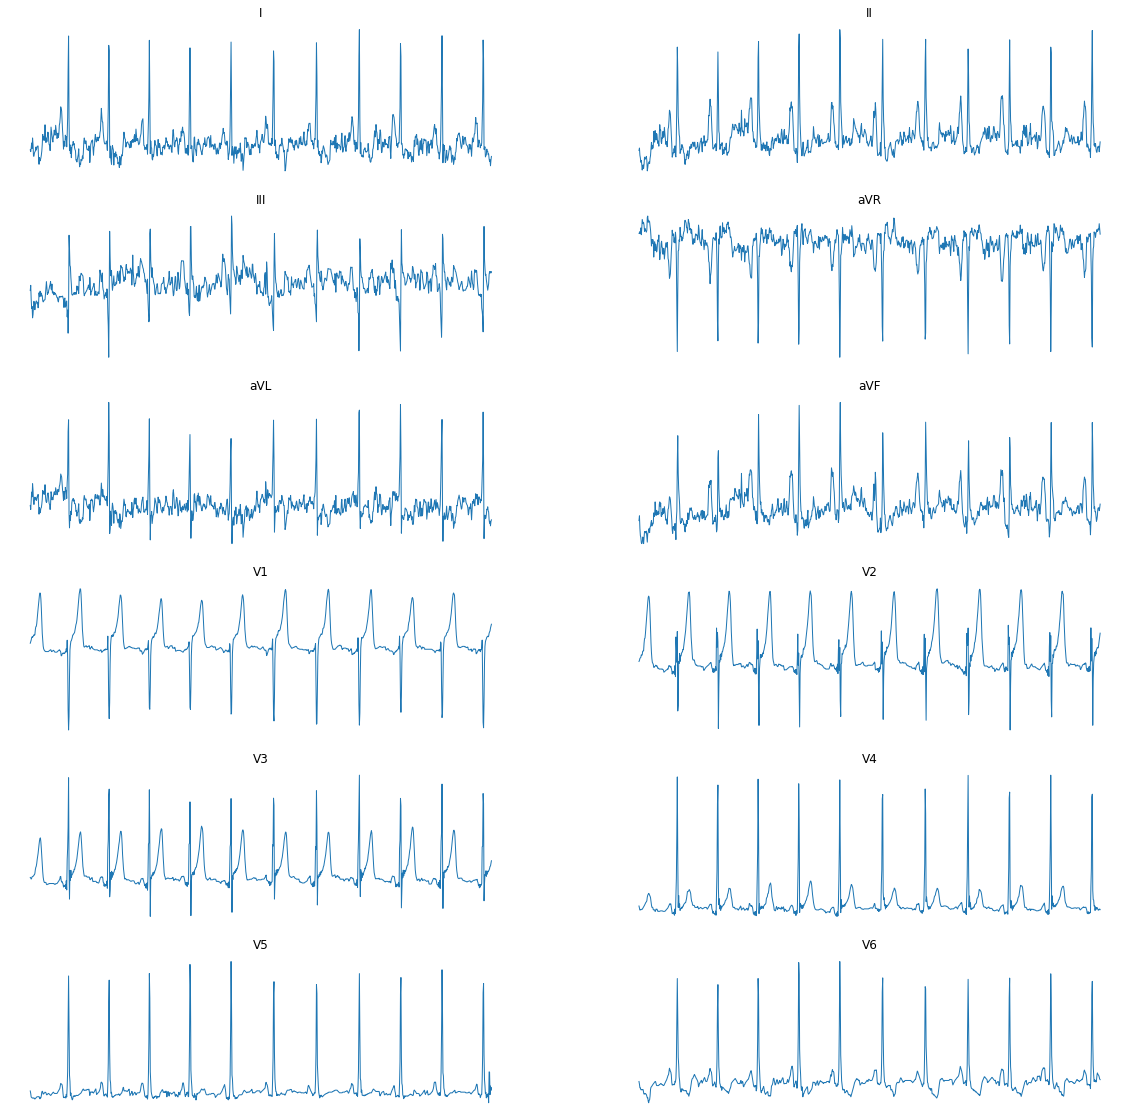

In [13]:
from random import randint
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
plt.rcParams["figure.figsize"] = (20.0, 20.0)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = (0.1, 0.1)
for i in range(5):
    ecg = signal_data[randint(0, 16000)]
    for index in range(12): 
        plt.subplot(6,2, index+1)
        plt.plot(ecg[:,index], linewidth=1)
        plt.gca()
        plt.title(titles[index])
        plt.axis("off")
    plt.show()

<h1>Обработка данных</h1>



In [12]:
annotation_data['diagnostic_superclass'] = annotation_data.scp_codes.apply(aggregate_diagnostic)

In [13]:
annotation_data['diagnostic_superclass'].value_counts()

diagnostic_superclass
[NORM]                 9083
[MI]                   2538
[STTC]                 2406
[CD]                   1709
[MI, CD]               1302
[STTC, HYP]             783
[MI, STTC]              602
[HYP]                   536
[STTC, CD]              472
[]                      407
[CD, NORM]              407
[MI, HYP, STTC]         359
[CD, HYP]               300
[MI, CD, STTC]          223
[STTC, CD, HYP]         211
[MI, HYP]               183
[MI, CD, HYP, STTC]     157
[MI, CD, HYP]           117
[STTC, NORM]             28
[CD, NORM, STTC]          5
[MI, STTC, HYP]           3
[CD, NORM, HYP]           2
[NORM, HYP]               2
[MI, STTC, CD, HYP]       1
[MI, CD, NORM, HYP]       1
Name: count, dtype: int64

<h3>Подчистим значения и дадим каждому классу заболеваний свой номер что бы работать с цифрами а не с буквами</h3>

In [14]:
delete_id=[]
signal_info=[]
for index in range(len(annotation_data)):
    if len(annotation_data['diagnostic_superclass'].iat[index]) == 0: 
        delete_id.append(index)
    else: 
        signal_info.append(signal_data[index])

In [15]:
for index in range(len(delete_id)):
    annotation_data = annotation_data.drop(annotation_data.index[[delete_id[index] - index]])

In [16]:
annotation_data['diagnostic_superclass'].value_counts()

diagnostic_superclass
[NORM]                 9083
[MI]                   2538
[STTC]                 2406
[CD]                   1709
[MI, CD]               1302
[STTC, HYP]             783
[MI, STTC]              602
[HYP]                   536
[STTC, CD]              472
[CD, NORM]              407
[MI, HYP, STTC]         359
[CD, HYP]               300
[MI, CD, STTC]          223
[STTC, CD, HYP]         211
[MI, HYP]               183
[MI, CD, HYP, STTC]     157
[MI, CD, HYP]           117
[STTC, NORM]             28
[CD, NORM, STTC]          5
[MI, STTC, HYP]           3
[CD, NORM, HYP]           2
[NORM, HYP]               2
[MI, STTC, CD, HYP]       1
[MI, CD, NORM, HYP]       1
Name: count, dtype: int64

In [19]:
signal_info=np.array(signal_info)

In [17]:
signal_info.shape

AttributeError: 'list' object has no attribute 'shape'

In [23]:
superclass_code=np.array(annotation_data['diagnostic_superclass'])
superclass_code

array([list(['NORM']), list(['NORM']), list(['NORM']), ...,
       list(['STTC']), list(['NORM']), list(['NORM'])], dtype=object)

In [24]:
superclass_code = superclass_code.reshape(len(superclass_code), 1)

In [25]:
superclass_code

array([[list(['NORM'])],
       [list(['NORM'])],
       [list(['NORM'])],
       ...,
       [list(['STTC'])],
       [list(['NORM'])],
       [list(['NORM'])]], dtype=object)

In [20]:
classes = np.array(['NORM', 'MI', 'STTC', 'CD', 'HYP'])

In [21]:
for index in range(len(superclass_code)):
    superclass_code[index] = np.where(classes == superclass_code[index][0][0])[0]

In [22]:
superclass_code

array([[0],
       [0],
       [0],
       ...,
       [2],
       [0],
       [0]], dtype=object)

In [25]:
superclass_code = superclass_code.reshape(1, -1)[0]

In [26]:
superclass_code

array([0, 0, 0, ..., 2, 0, 0], dtype=object)

In [27]:
superclass_code=superclass_code.astype('int8')

In [28]:
superclass_code

array([0, 0, 0, ..., 2, 0, 0], dtype=int8)

In [32]:
annotation_data["superclass_code"]=superclass_code

In [33]:
annotation_data.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass,superclass_code
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM],0
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM],0
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM],0
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM],0
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM],0


<h2>Визуализируем данные и небольшую статистику</h2>

In [34]:
annotation_data["superclass_code"].value_counts()

0    9528
1    5485
2    3189
3    2692
4     536
Name: superclass_code, dtype: int64

<ul>
    <li>0 - > NORM</li>
    <li>1 - > MI</li>
    <li>2 - > STTC</li>
    <li>3 - > CD</li>
    <li>4 - > HYP</li>
</ul>

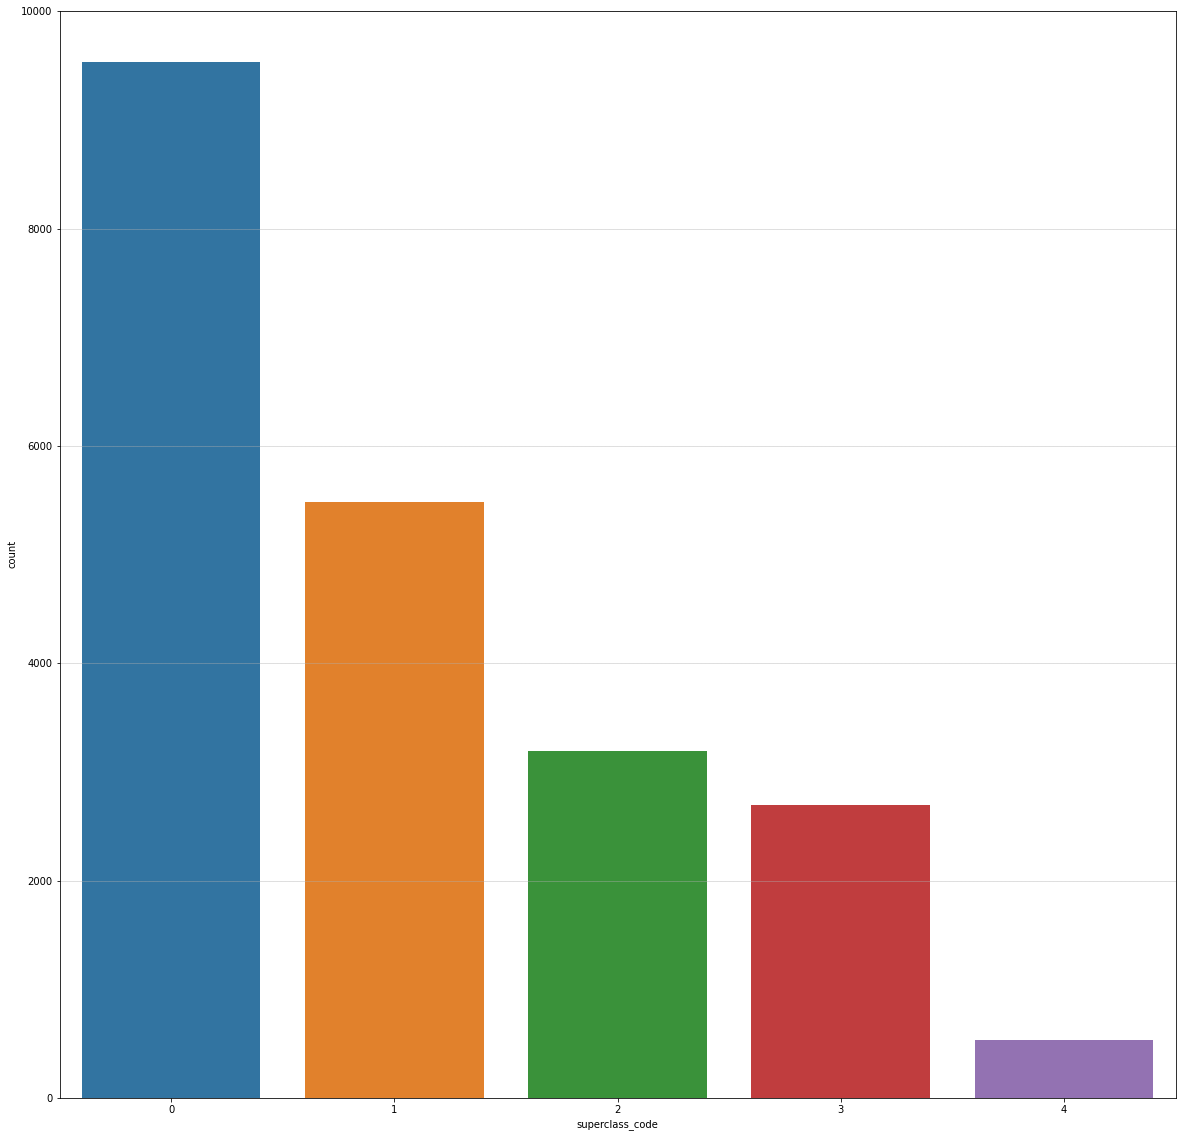

In [36]:
sns.countplot(x='superclass_code', data=annotation_data)
pass

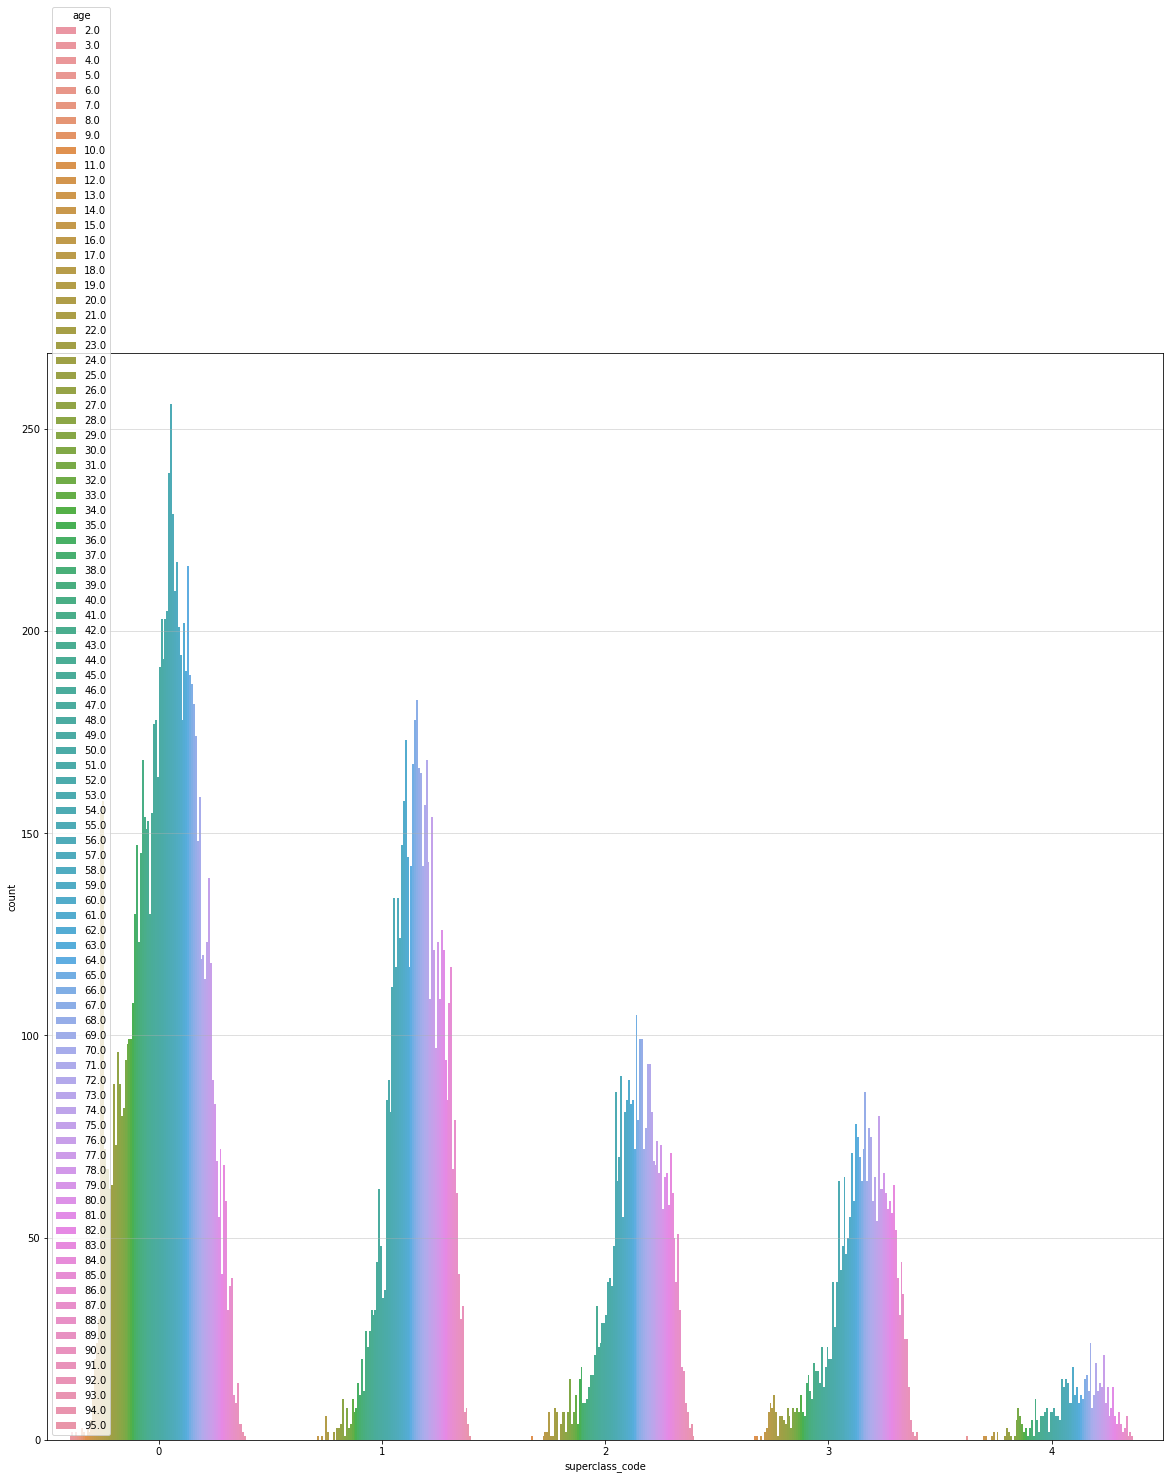

In [37]:
sns.countplot(x='superclass_code', hue='age', data=annotation_data)
pass

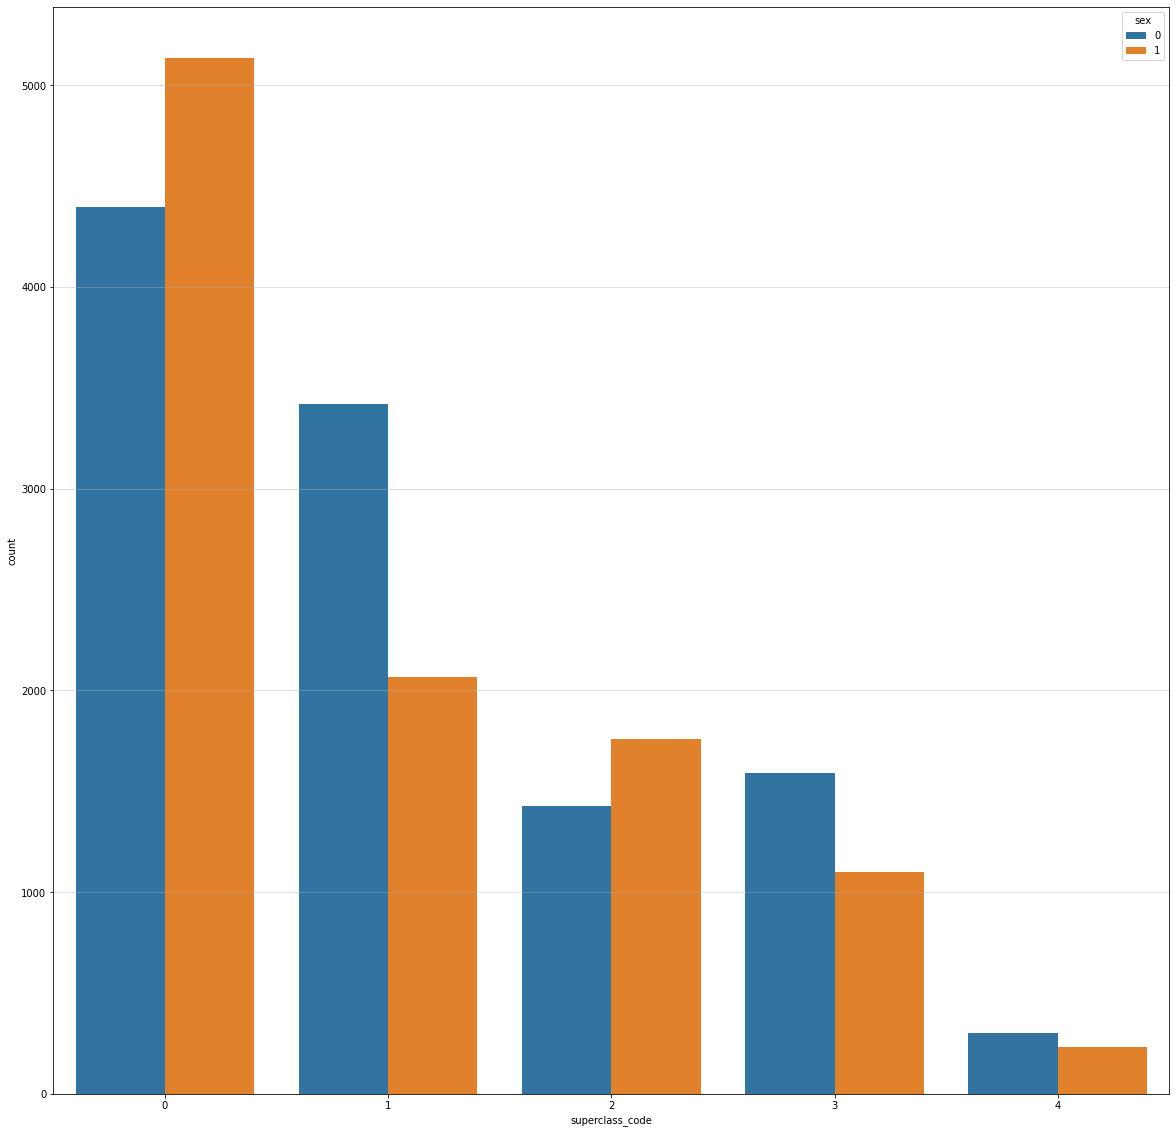

In [38]:
sns.countplot(x='superclass_code', hue='sex', data=annotation_data)
pass

<h1>Разбиение на обучающую и тестовые выборки</h1>

In [40]:
signal_info=signal_info.reshape(signal_info.shape[0],12000)
signal_info.shape

(21430, 12000)

In [42]:
test_fold = 10
X_train = signal_info[np.where(annotation_data.strat_fold  != test_fold)]
Y_train = annotation_data[(annotation_data.strat_fold  != test_fold)].superclass_code

X_test = signal_info[np.where(annotation_data.strat_fold  == test_fold)]
Y_test = annotation_data[(annotation_data.strat_fold  == test_fold)].superclass_code

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(19267, 12000) (19267,) (2163, 12000) (2163,)


In [46]:
np.save('Train\X_train',X_train)
np.save('Train\Y_train',Y_train)
np.save('Test\X_test',X_test)
np.save('Test\Y_test',Y_test)